In [9]:
import h5py
import numpy as np
from astropy.cosmology import Planck15 as cosmo
import matplotlib.pyplot as plt
#plt.style.use('../Notebook.mystyle')

In [10]:
fmap = h5py.File('../spectra/map_TNG_true_z2.6_pixres_12.3.hdf5', 'r')
fspec = h5py.File('../spectra/spectra_TNG_true_0.5_z2.6_res12.3.hdf5', 'r')
z = fmap['redshift'][()]

In [11]:
print(fmap.keys())
print(fspec.keys())

<KeysViewHDF5 ['NHI', 'flux', 'map', 'redshift']>
<KeysViewHDF5 ['Header', 'colden', 'density_weight_density', 'num_important', 'spectra', 'tau', 'tau_obs', 'temperature', 'velocity']>


In [12]:
print(fmap['NHI'][:].shape)
print(fspec['tau/H/1/1215'][:].shape)

(410, 410, 1781)
(168100, 1780)


In [13]:
fspec['temperature']

<HDF5 group "/temperature" (0 members)>

The pixel size is close to 12.4 though. When I was naming the file, I did not round it unfortunately. Sorry!

In [11]:
cosmo.H(z=z)*(205/((1+z)*cosmo.h))/1781

<Quantity 12.39747152 km / (Mpc s)>

Looking at NHI and flux along the line-of-sight :

In [2]:
cd ../LyTomo-Watershed/

/run/media/mahdi/HD2/Lya/LyTomo-Watershed


I have calculated the spectra file again, now getting the map file for that :

In [66]:
from codes import spectra_mocking
spectra_mocking.get_noiseless_uniform_grid_map(spec_file='../spectra/spectra_TNG_true_0.5_z2.6_res12.4.hdf5',
                                                    savefile='../spectra/map_TNG_true_z2.6_pixres_12.4.hdf5',
                                                    xdim=410, ydim=410)

mean_flux before correction = 0.76438993
after correc=  0.7744605
desired =  0.7822907452303878


In [25]:
fmapnew_spec = h5py.File('../spectra/map_TNG_true_z2.6_pixres_12.4.hdf5', 'r')
fmapnew_spec['flux'].shape

(410, 410, 1780)

Generating new spectra and noiseless map and comparing it with the one we already used above shows they are good.

(410, 410, 1781)
(410, 410, 1780)


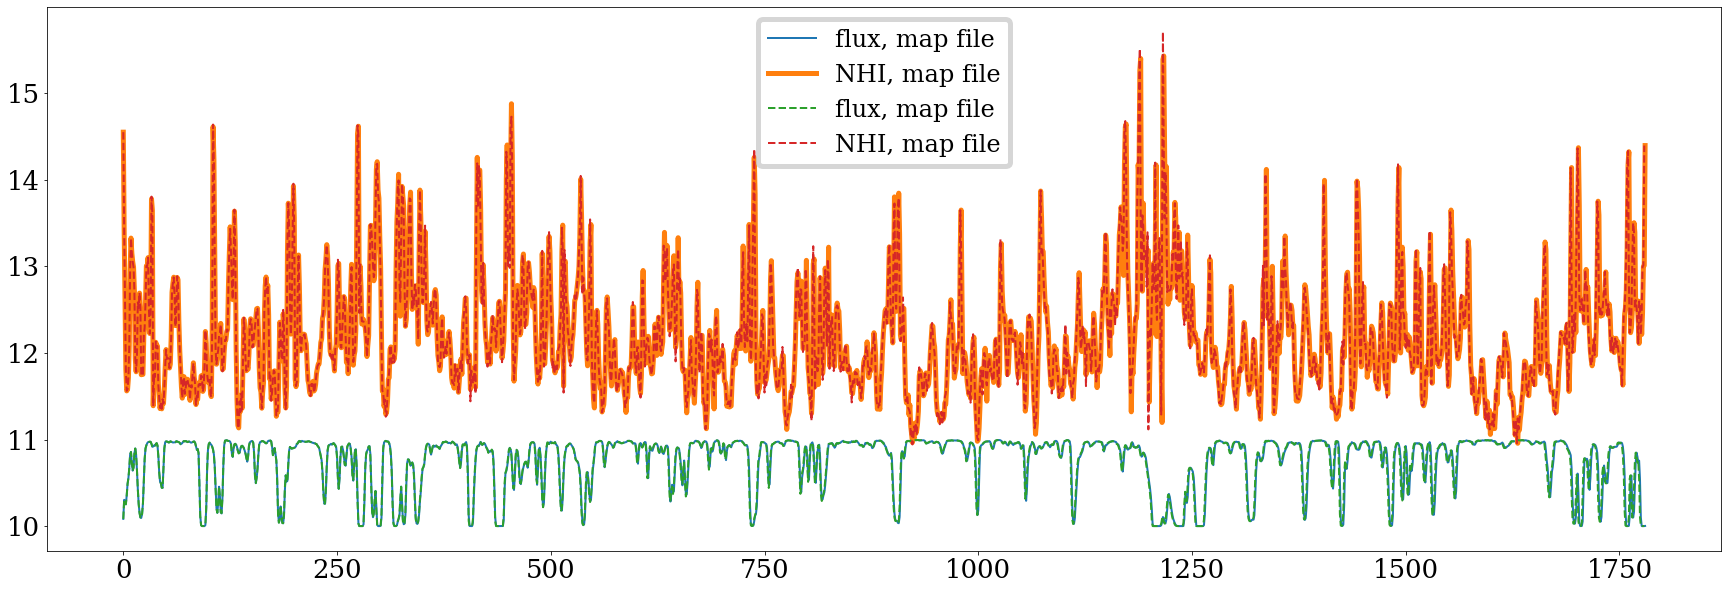

In [82]:
def plot_spec_NHI():
    fig, ax = plt.subplots(1,1,figsize=(30,10))
    ax.plot(10+fmap['flux'][100,150,:], label='flux, map file', lw=2)
    print(fmap['flux'].shape)
    print(fmapnew_spec['flux'].shape)
    ax.plot(np.log10(fmap['NHI'][100,150,:]), label='NHI, map file')
    ax.plot(10+fmapnew_spec['flux'][150,100,:], label='flux, map file', lw=2, ls='--')
    ax.plot(np.log10(fmapnew_spec['NHI'][150,100,:]), label='NHI, map file', lw=2, ls='--')
    ax.legend()
plot_spec_NHI()

## CDDF :

In [5]:
def plot_cddf(savedir='../spectra/', savefile='spectra_TNG_true_0.5_z2.6_res12.3.hdf5',
             res= 12.398842898635227, color='C0'):    
    import fake_spectra
    from fake_spectra import plot_spectra
    # Our simulation snapshot
    ps = plot_spectra.PlottingSpectra(num=1, base='../spectra', savedir=savedir,
                                      savefile=savefile, 
                                      res=res)
    ps.plot_cddf(color=color)
        
    plt.xlim(1e20,1e23)
    plt.ylim(1e-27,1e-19)

def plot_cddf_obs():
    # Bird et. al. 1610.01165
    f_N_GP = np.loadtxt('../spectra/gp_cddf_Bird16.txt')
    f_N_GP_lower = np.loadtxt('../spectra/gp_cddf_lower_Bird16.txt')
    f_N_GP_upper = np.loadtxt('../spectra/gp_cddf_upper_Bird16.txt')
    f_N_GP_upper = f_N_GP_upper - f_N_GP
    f_N_GP_lower = f_N_GP - f_N_GP_lower
    
    NH_GP_lower = 10**np.arange(20, 23, 0.1)
    NH_GP_upper = 10**np.arange(20.1, 23.1, 0.1)
    NH_GP = (NH_GP_lower[:]+ NH_GP_upper[:])/2.0
    NH_GP_upper = NH_GP_upper - NH_GP
    NH_GP_lower = NH_GP - NH_GP_lower
    
    plt.errorbar(NH_GP, f_N_GP, xerr=[NH_GP_lower, NH_GP_upper], 
                 yerr=[f_N_GP_lower,f_N_GP_upper], marker='o', 
                 linestyle='', label='Bird et al. 2016, z=[2.5,3.0]')
    plt.legend()
    

dvbin =  12.398842898635227
168100  sightlines. resolution:  12.398842898635227  z= 2.5772902716018935
dvbin =  12.398842898635227
168100  sightlines. resolution:  12.398842898635227  z= 2.5772902716018935
dvbin =  5.382912282822123
1200  sightlines. resolution:  5.382912282822123  z= 2.5772902716018935


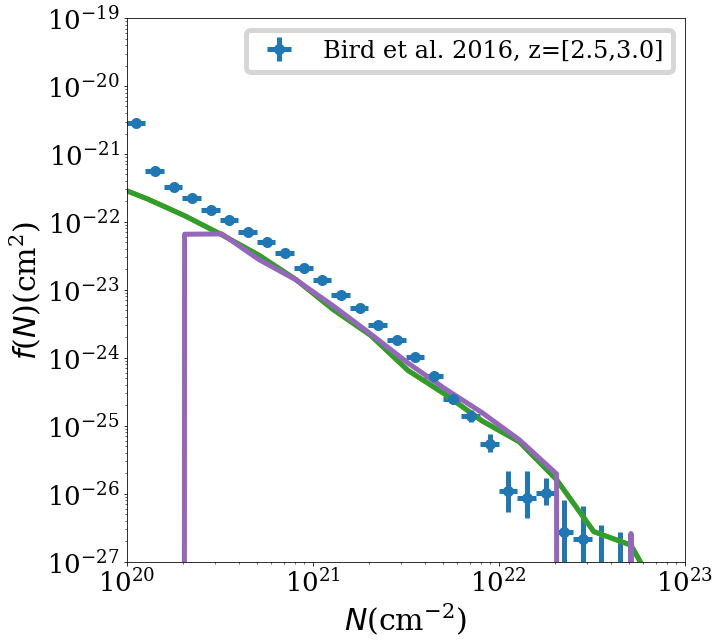

In [11]:
plot_cddf(savedir='../spectra/', savefile='spectra_TNG_true_0.5_z2.6_res12.3.hdf5',
          res= 12.398842898635227, color='C1')
plot_cddf(savedir='../spectra/', savefile='spectra_TNG_true_0.5_z2.6_res12.4.hdf5',
          res= 12.398842898635227, color='C2')
#plot_cddf(savedir='../LyTomo_data/spectra_z2.6/', savefile='spectra_TNG_true_1.0_z2.6.hdf5', 
#          res= 5.382912282822123, color='C3')
plot_cddf(savedir='../spectra/', savefile='spectra_TNG_DLAs.hdf5', 
          res= 5.382912282822123, color='C4')

plot_cddf_obs()

## Constrain the accuracy of N-Body+FGPA:

### Set a cap on NHI of the absorbors:

Drew's suggestion : "Set an upper limit on NHI in each voxel of 10^16, then to (re)calculate the spectra. (So instead of throwing out the whole sightlines, we approximate what the spectra would look like in the N-body mocks.)"


- [ ] After discussion with Simeon:
  - To convert $N_{HI} = 1e16 $ to physcial by dividing it by Unit length (i.e. ckpc/h) and then place the cap [here](https://github.com/sbird/fake_spectra/blob/2658b3aa045076d16d5659b30384ddaa868717cd/fake_spectra/spectra.py#L530). 
  - Since you only really need order of magnitude you can do a simple curve of growth argument
  - There are a couple of ways but you can also just use the star-forming gas threshold

The First suggestion :

In [22]:
## Find the equivalent physical density of the particles in cm^-3
def get_dens_thresh():
    UnitLength_in_cm= 3.085678e21
    h = cosmo.h
    z=2.5772902716018935
    a = 1/(1+z)
    return (1e16)/(UnitLength_in_cm*a/h)
get_dens_thresh()

7.853238186172123e-06

Is this too small ? 

The mean width of each particle  :

In [21]:
205000/(2500*3.7*0.67)

33.077853973376364

So, we set the cap at $n_{HI} = 10^{-5} cm^{-3} $.
On the plots below, we compare the capped spectra and maps with the untouched ones.

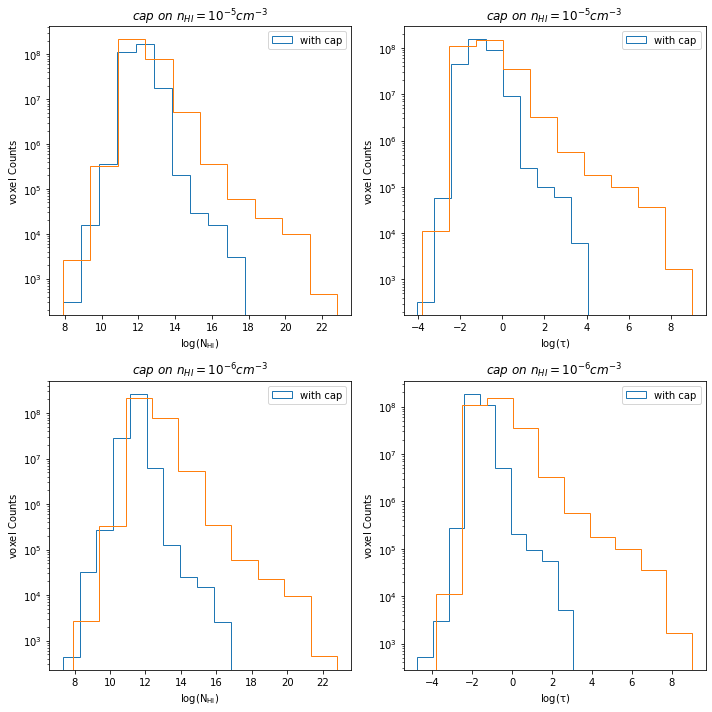

In [8]:
## Comapre the tau and NHI histogram
def check_cap_spectra(fname, fig, ax, axt, title):
    with h5py.File(fname,'r') as f:
        ax.hist(np.log10(np.ravel(f['colden/H/1'][:])), histtype='step', label='with cap')
        axt.hist(np.log10(np.ravel(f['tau/H/1/1215'][:])), histtype='step', label='with cap')
    with h5py.File('../spectra/spectra_TNG_true_0.5_z2.6_res12.4.hdf5','r') as f:
        ax.hist(np.log10(np.ravel(f['colden/H/1'][:])), histtype='step')
        axt.hist(np.log10(np.ravel(f['tau/H/1/1215'][:])), histtype='step')
    ax.set_yscale('log')
    axt.set_yscale('log')
    ax.set_title(title)
    axt.set_title(title)
    ax.legend()
    axt.legend()
    ax.set_xlabel(r'$\mathrm{log (N_{HI})}$')
    ax.set_ylabel(r'$\mathrm{voxel \ Counts}$')
    axt.set_xlabel(r'$\mathrm{log (\tau)}$')
    axt.set_ylabel(r'$\mathrm{voxel \ Counts}$')
fig, ax = plt.subplots(2,2, figsize=(10,10))
check_cap_spectra(fname='../spectra/spectra_TNG_true_0.5_z2.6_res12.4_nH_cap_1e-5.hdf5', fig=fig, ax=ax[0,0], axt=ax[0,1], title=r'$cap \ on \ n_{HI} = 10^{-5} cm^{-3}$')
check_cap_spectra(fname='../spectra/spectra_TNG_true_0.5_z2.6_res12.4_nH_cap_1e-6.hdf5', fig=fig, ax=ax[1,0], axt=ax[1,1], title=r'$cap \ on \ n_{HI} = 10^{-6} cm^{-3}$')
fig.tight_layout()

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


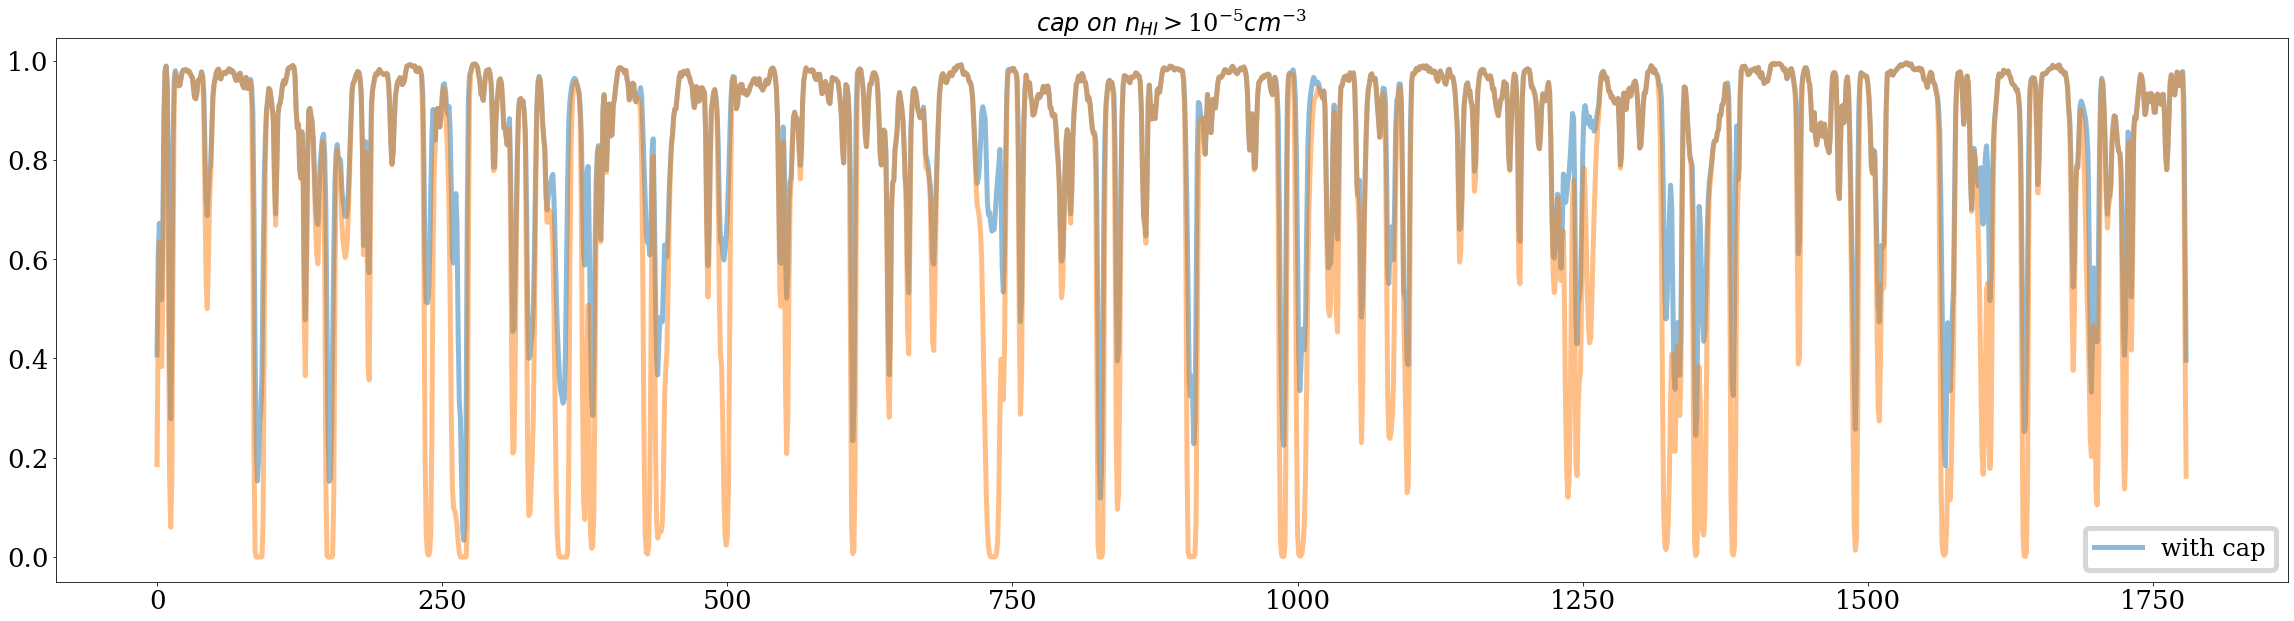

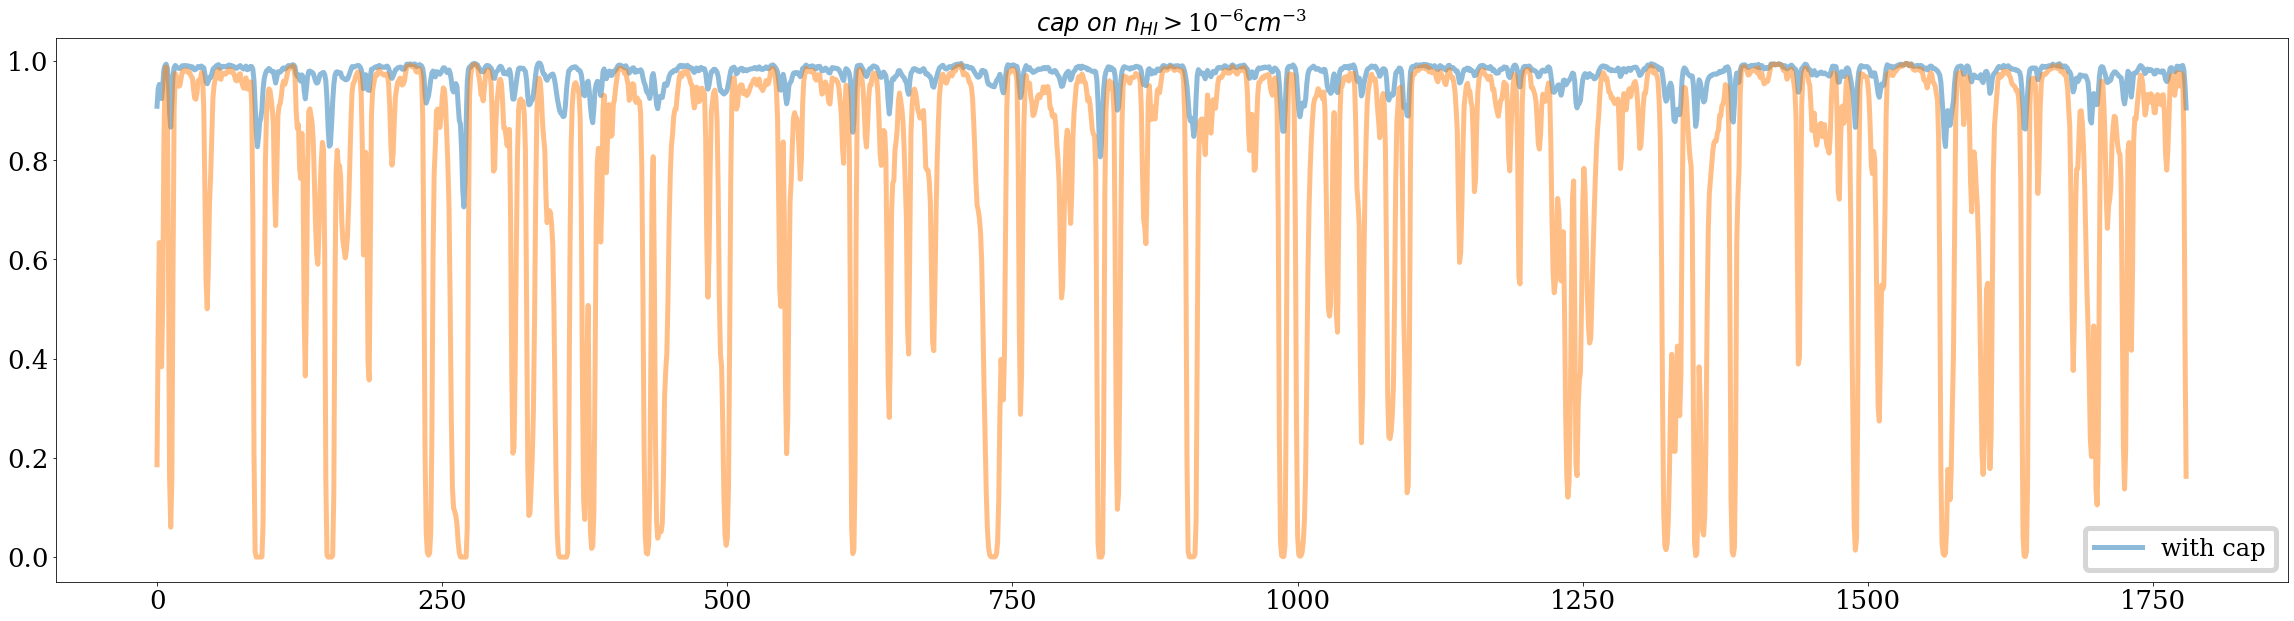

In [11]:
## Compare the spectra
def plot_spectra(fname, title):
    plt.style.use('../Notebook.mystyle')
    fig, ax = plt.subplots(1,1, figsize=(40,10))
    with h5py.File(fname,'r') as f:
        ax.plot(np.exp(-f['tau/H/1/1215'][5]), alpha=0.5, label='with cap')
    with h5py.File('../spectra/spectra_TNG_true_0.5_z2.6_res12.4.hdf5','r') as f:
        ax.plot(np.exp(-f['tau/H/1/1215'][5]), alpha=0.5)
    ax.legend()
    ax.set_title(title)
plot_spectra(fname='../spectra/spectra_TNG_true_0.5_z2.6_res12.4_nH_cap_1e-5.hdf5', title=r'$cap \ on \ n_{HI} > 10^{-5} cm^{-3}$')
plot_spectra(fname='../spectra/spectra_TNG_true_0.5_z2.6_res12.4_nH_cap_1e-6.hdf5', title=r'$cap \ on \ n_{HI} > 10^{-6} cm^{-3}$' )

#### Making the map (fixing the mean flux) :

In [15]:
cd ../LyTomo-Watershed/


/run/media/mahdi/HD2/Lya/LyTomo-Watershed


In [72]:
## Make the map
from codes import spectra_mocking
spectra_mocking.get_noiseless_uniform_grid_map(spec_file='../spectra/spectra_TNG_true_0.5_z2.6_res12.4_nH_cap_1e-5.hdf5',
                                                    savefile='../spectra/map_TNG_true_z2.6_pixres_12.4_nH_cap_1e-5.hdf5',
                                                    xdim=410, ydim=410)

mean_flux before correction = 0.76438993
after correc=  0.7744605
desired =  0.7822907452303878


In [17]:
## Make the flux map
from codes import spectra_mocking
spectra_mocking.get_noiseless_uniform_grid_map(spec_file='../spectra/spectra_TNG_true_0.5_z2.6_res12.4_nH_cap_1e-6.hdf5',
                                                    savefile='../spectra/map_TNG_true_z2.6_pixres_12.4_nH_cap_1e-6.hdf5',
                                                    xdim=410, ydim=410)

mean_flux before correction = 0.96922284
after correc=  0.7822936
desired =  0.7822907452303878


In [37]:
## Comapare the maps. tau is scaled in each case seperately.
def plot_maps(fname, title, sm=None):
    from scipy.ndimage import gaussian_filter1d as gf
    fig, ax = plt.subplots(1,1, figsize=(40,10))
    with h5py.File(fname,'r') as f:
        try :
            if sm is None:
                flux = f['flux'][300,60]
            else:
                flux = gf(f['flux'][300,60], sm, mode='wrap')  
            ax.plot(flux, alpha=0.5, label='with cap')
        except :
            if sm is None:
                flux = f['map'][300,60]
            else:
                flux = gf(f['map'][300,60], sm, mode='wrap')
                ax.plot(flux, alpha=0.5, label='FGPA')
            
    with h5py.File('../spectra/map_TNG_true_z2.6_pixres_12.4.hdf5','r') as f:
        if sm is None:
            flux = f['flux'][300,60]
        else:
            flux = gf(f['flux'][300,60], sm, mode='wrap')  
        ax.plot(flux, alpha=0.5)
    ax.legend()
    ax.set_title(title)

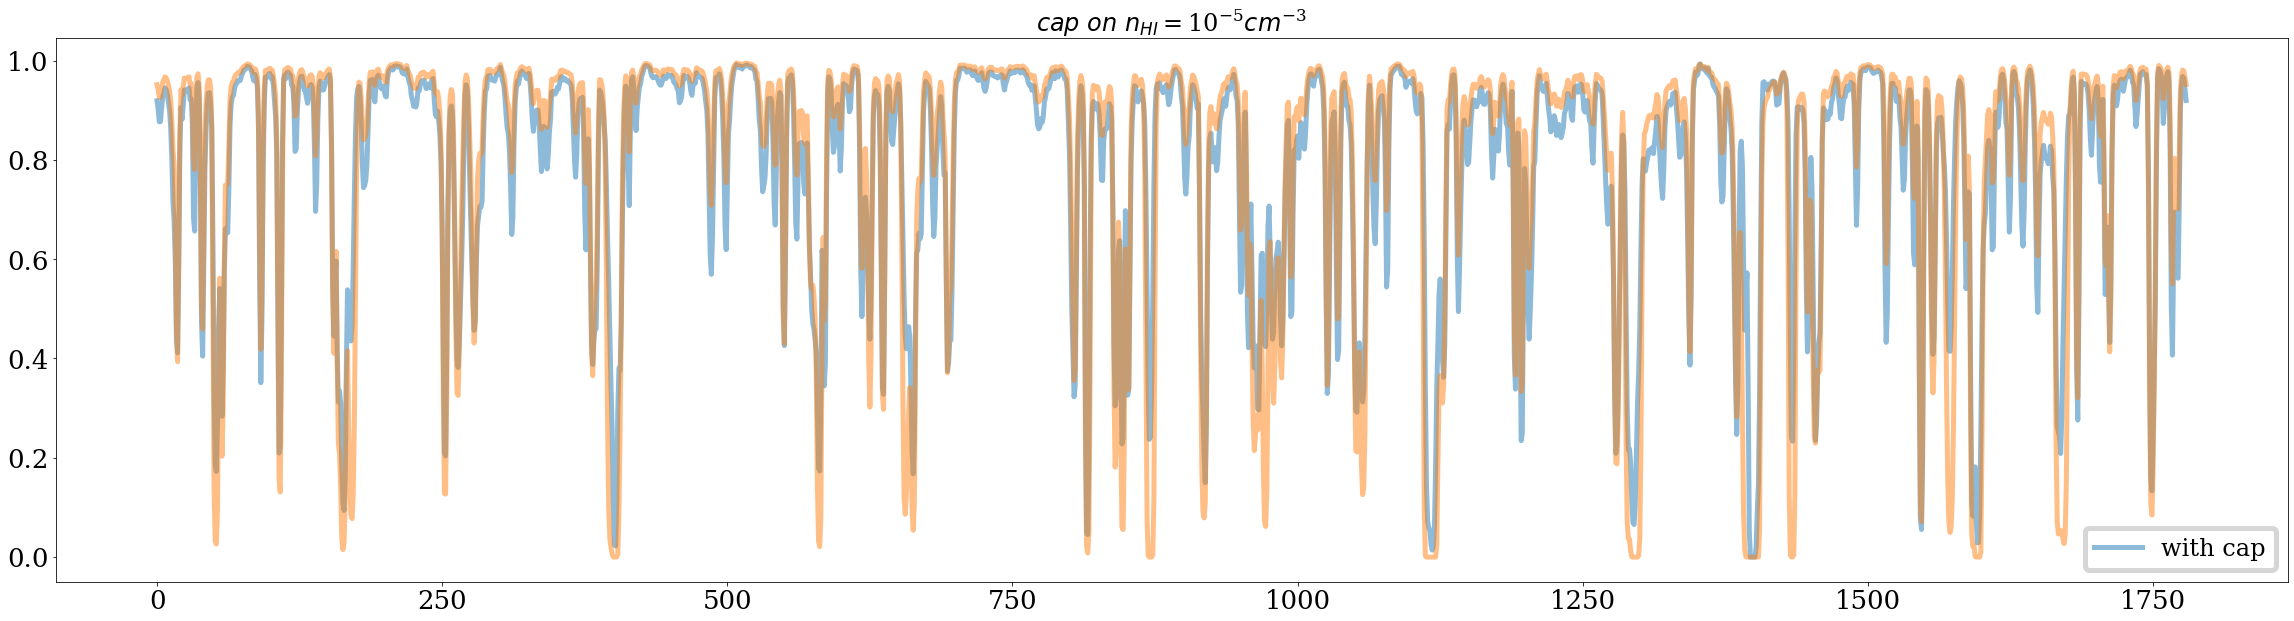

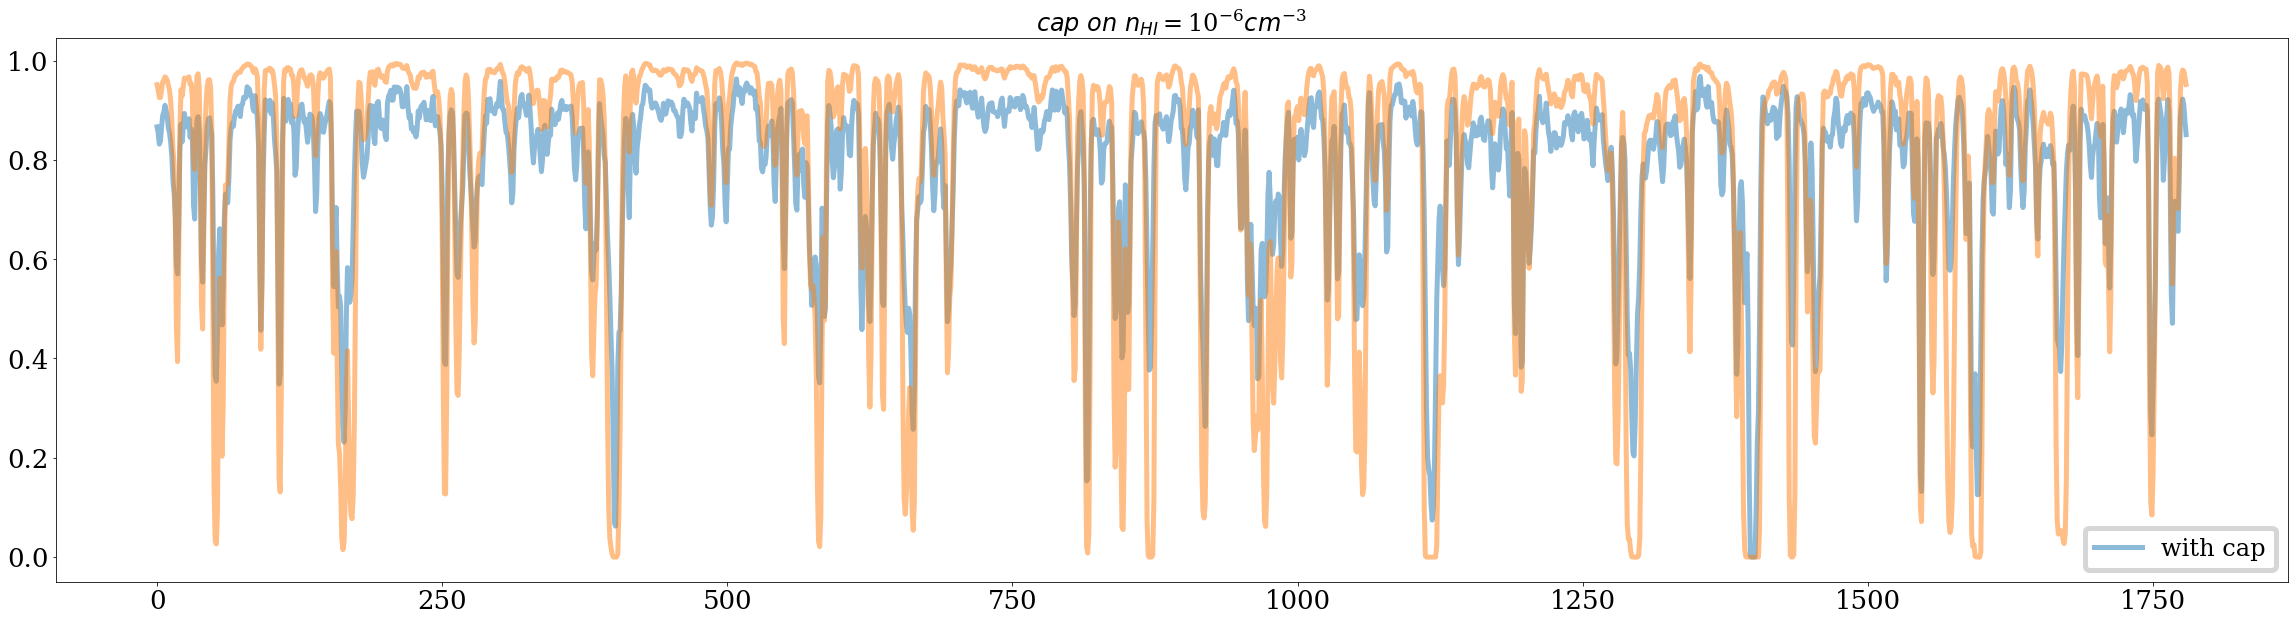

In [34]:
plot_maps(fname='../spectra/map_TNG_true_z2.6_pixres_12.4_nH_cap_1e-5.hdf5', title=r'$cap \ on \ n_{HI} = 10^{-5} cm^{-3}$')
plot_maps(fname='../spectra/map_TNG_true_z2.6_pixres_12.4_nH_cap_1e-6.hdf5', title=r'$cap \ on \ n_{HI} = 10^{-6} cm^{-3}$')

So, the plot above shows if we scale $\tau$ differently, the spectra look slightly different. Below, I make a new capped map while keeping $\tau$ scaling the same. 

In [21]:
def get_the_tau_scale(f):
    from fake_spectra import fluxstatistics as fstat
    from codes.spectra_mocking import get_mean_flux
    tau = f['tau/H/1/1215'][:]
    mean_flux_desired = get_mean_flux(z=f['Header'].attrs['redshift'])
    NHI = np.sum(f['colden/H/1'][:], axis=1)
    ind = np.where(NHI < 10**19.)
    scale = fstat.mean_flux(tau[ind], mean_flux_desired)
    print(scale)
get_the_tau_scale(f=h5py.File('../spectra/spectra_TNG_true_0.5_z2.6_res12.4.hdf5','r'))
get_the_tau_scale(f=h5py.File('../spectra/spectra_TNG_true_0.5_z2.6_res12.4_nH_cap_1e-5.hdf5','r'))
get_the_tau_scale(f=h5py.File('../spectra/spectra_TNG_true_0.5_z2.6_res12.4_nH_cap_1e-6.hdf5','r'))

0.9166744217636166
1.5578294160811477
9.097504000237608


In [3]:
cd ../LyTomo-Watershed/

/run/media/mahdi/HD2/Lya/LyTomo-Watershed


In [4]:
## Make the flux map by keeping the tau scale the same
from codes import spectra_mocking
spectra_mocking.get_noiseless_uniform_grid_map(spec_file='../spectra/spectra_TNG_true_0.5_z2.6_res12.4_nH_cap_1e-5.hdf5',
                                               savefile='../spectra/map_TNG_true_z2.6_pixres_12.4_nH_cap_1e-5_same_tau_scale.hdf5',
                                               xdim=410, ydim=410, tau_scale=0.9166744217636175)

mean_flux before correction = 0.8420715
after correc=  0.8522375
desired =  0.7822907452303878


In [24]:
## Make the flux map by keeping the tau scale the same
from codes import spectra_mocking
spectra_mocking.get_noiseless_uniform_grid_map(spec_file='../spectra/spectra_TNG_true_0.5_z2.6_res12.4_nH_cap_1e-6.hdf5',
                                               savefile='../spectra/map_TNG_true_z2.6_pixres_12.4_nH_cap_1e-6_same_tau_scale.hdf5',
                                               xdim=410, ydim=410, tau_scale=0.9166744217636166)

mean_flux before correction = 0.96922284
after correc=  0.9716394
desired =  0.7822907452303878


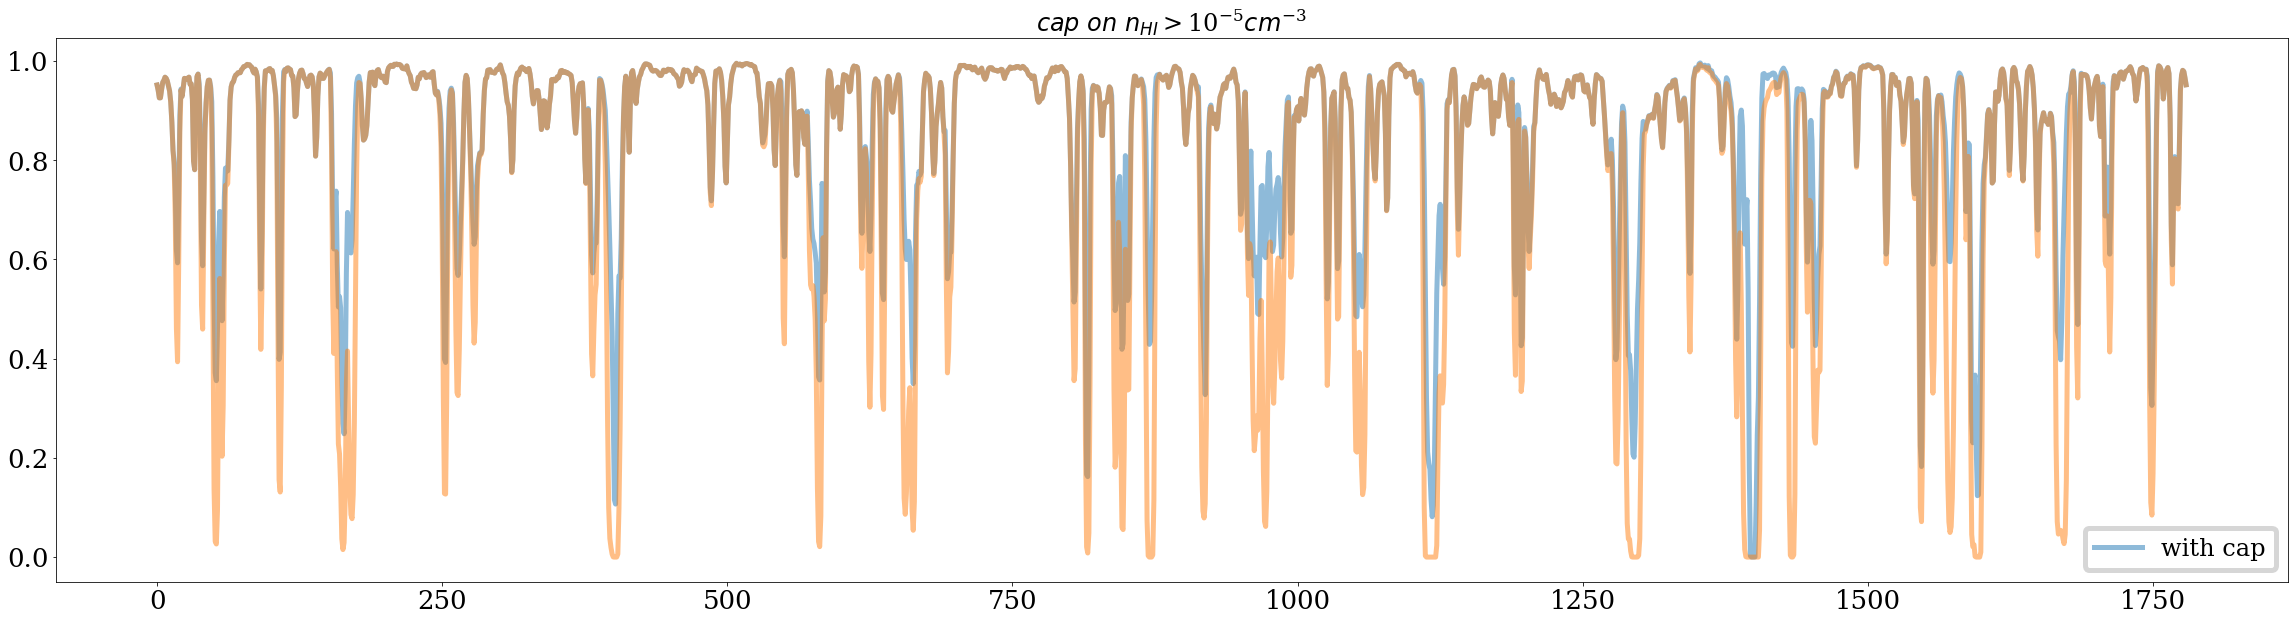

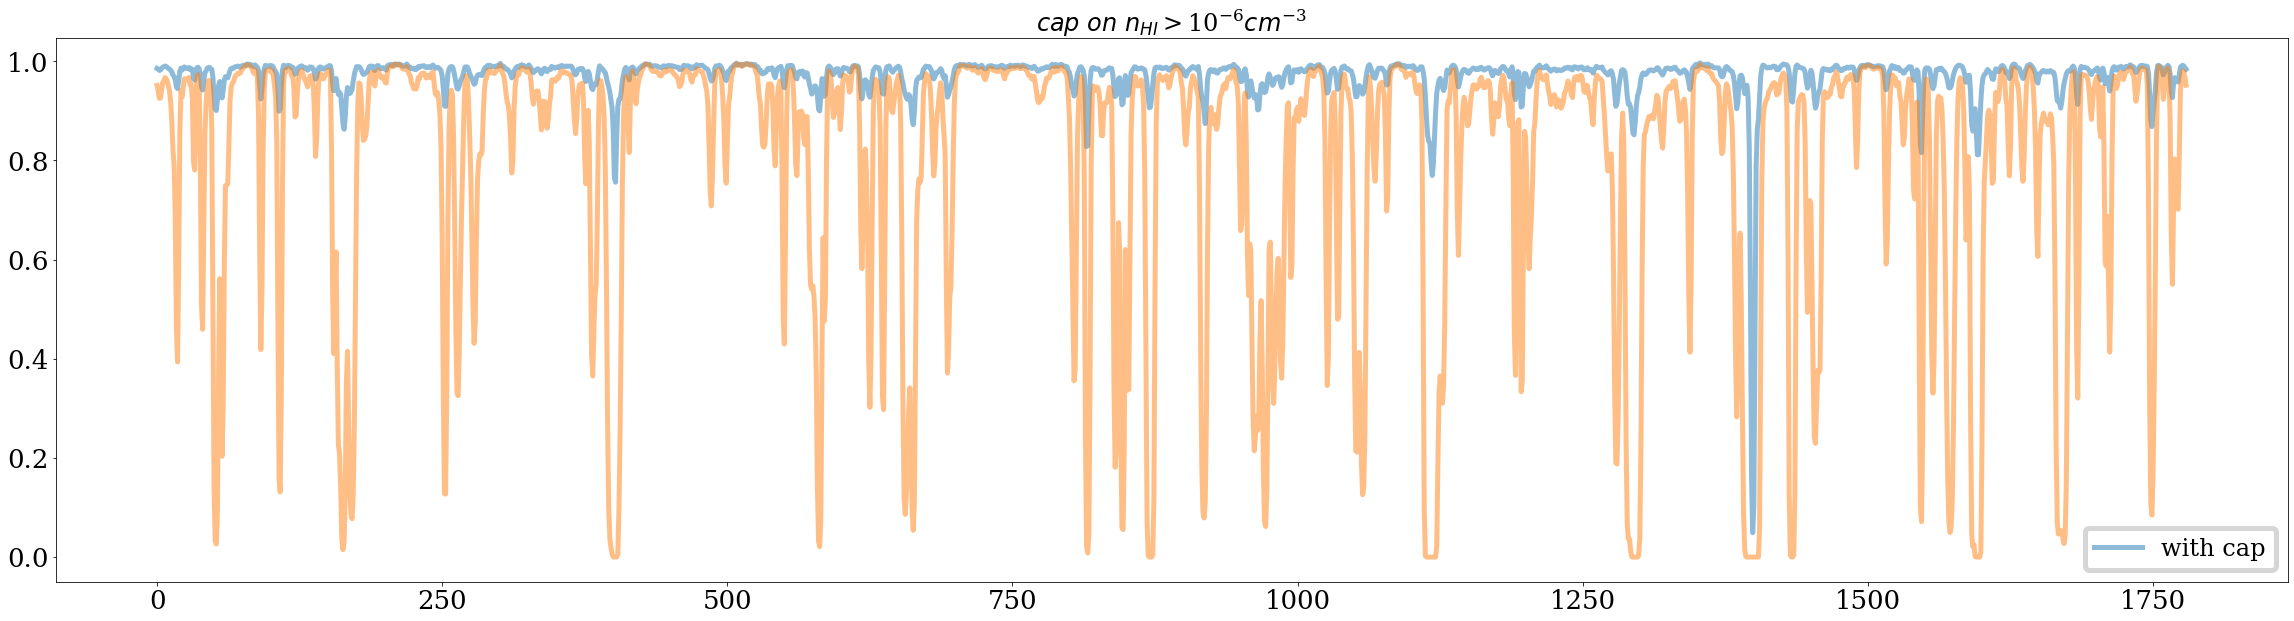

In [30]:
## Comapare the maps. tau is scaled the same
plot_maps(fname='../spectra/map_TNG_true_z2.6_pixres_12.4_nH_cap_1e-5_same_tau_scale.hdf5', title=r'$cap \ on \ n_{HI} > 10^{-5} cm^{-3}$')
plot_maps(fname='../spectra/map_TNG_true_z2.6_pixres_12.4_nH_cap_1e-6_same_tau_scale.hdf5', title=r'$cap \ on \ n_{HI} > 10^{-6} cm^{-3}$')

### Generate FGPA map and spectra at z=2.7 :


In the 'spectra' for FGPA at z=2.7, I assume Drew is interested in N_HI because the flux already exists the 'map' file (Doese he have the FGPA map at z=2.7 ? ). But, N_HI is off by a constant in FGPA approach and we fix that by setting the mean flux.

- Btw, even for hydro the NHI should be scaled with the same scaling factor as $\tau$!!

- [ ]  I can then calculate the FGPA spectra including the NHI. 

Drew does not need the N_HI alonf each spectra. So, a high resolution (1780 pixels) FGPA flux map is enough!


#### High-res maps :

1780
1780


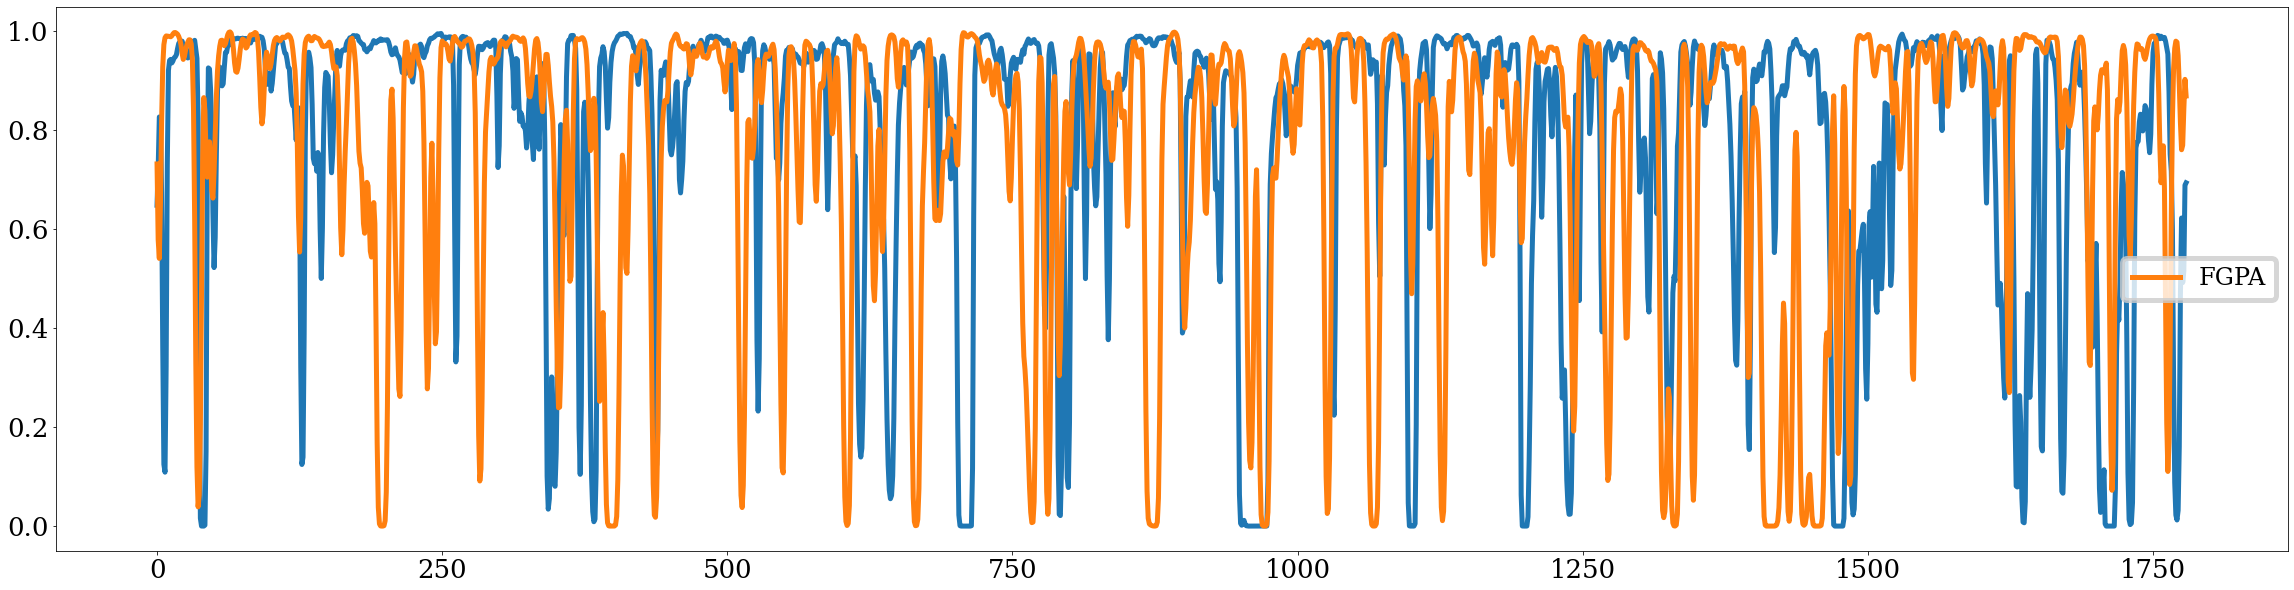

In [83]:
def plot_FGPA():
    fig, ax = plt.subplots(1,1, figsize=(40,10))
    with h5py.File('../spectra/map_TNG_true_z2.6_pixres_12.4.hdf5','r') as f:
        flux = f['flux'][100,30,:]
        print(flux.size)
        ax.plot(flux)
    with h5py.File('../spectra/FGPA_DMonly_flux_z2.6_pix_1780.hdf5','r') as f:
        flux = f['map'][100,30,:]
        print(flux.size)
        ax.plot(flux, label='FGPA')
    ax.legend()
         
plot_FGPA()

The FGPA map with high resolution is very different from the companion hydro spectra. 
- [ ] May be the exact x,y of the sightline really matters and therefore a linear interpolation may help to alleciate this.

Make a corser FGPA map (0.5 cMpc/h) and comapring wiht the companion hydro spectra looks reasonable. 

#### Low-res map :

410
410


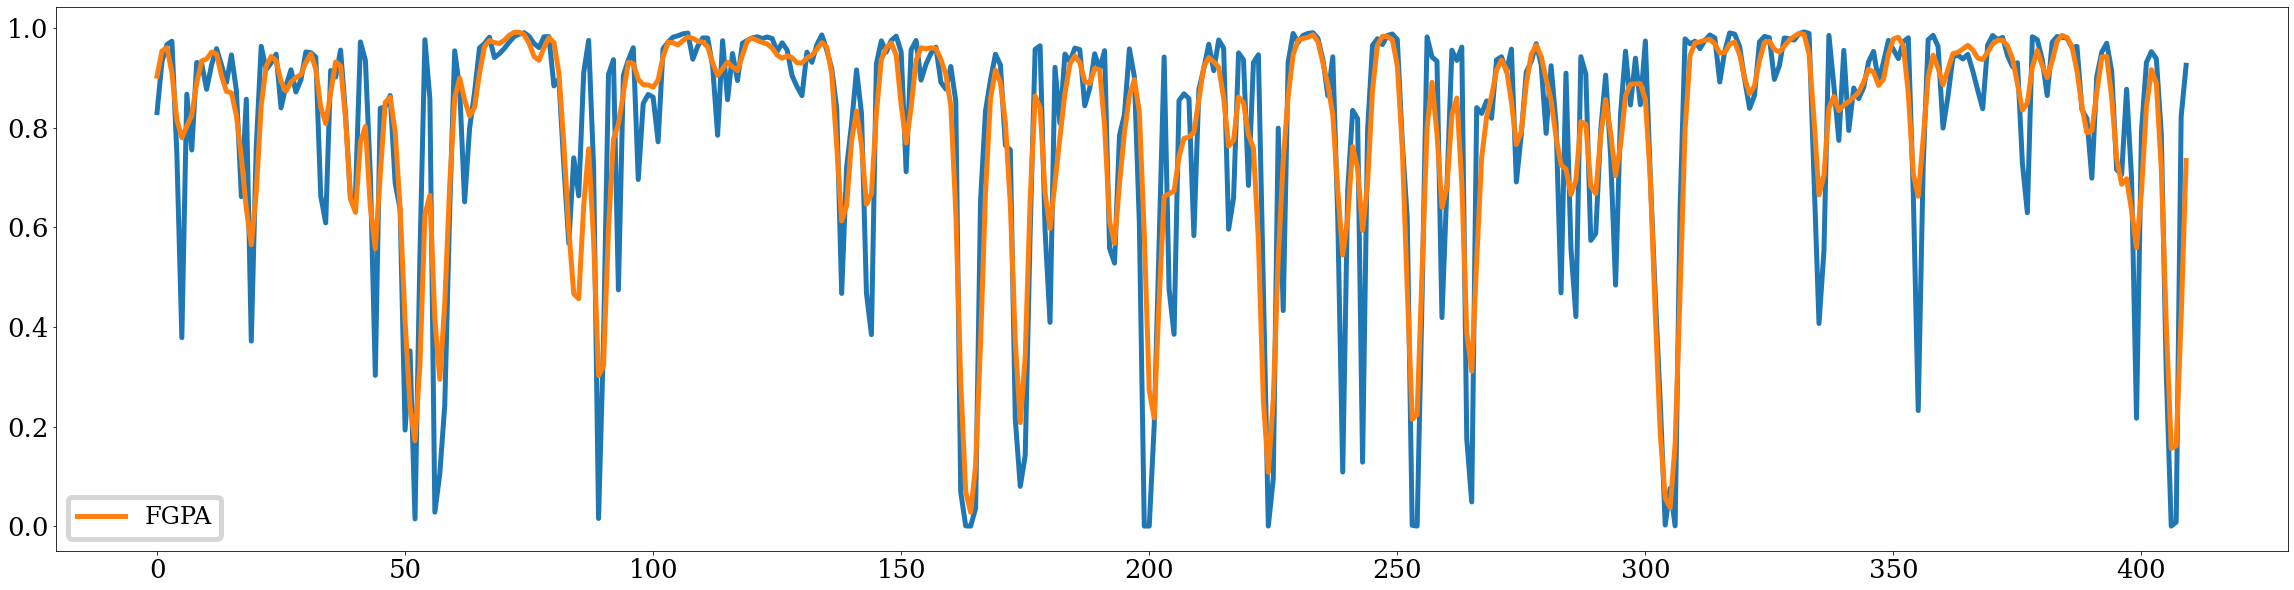

In [78]:
def plot_FGPA():
    fig, ax = plt.subplots(1,1, figsize=(40,10))
    with h5py.File('../spectra/map_TNG_true_0.5_z2.6.hdf5','r') as f:
        flux = f['flux'][100,30,:]
        print(flux.size)
        ax.plot(flux)
    with h5py.File('../spectra/FGPA_DMonly_flux_z2.6_0.5Mpc.hdf5','r') as f:
        flux = f['map'][100,30,:]
        print(flux.size)
        ax.plot(flux, label='FGPA')
    ax.legend()
        
plot_FGPA()